In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sys

sys.path.append('../model_framework')

from visualizations import plot_data_point_array
from data_io import read_training_files

2023-02-14 14:42:06.627243: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 14:42:06.935298: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 14:42:06.935394: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-14 14:42:08.780764: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-1

In [2]:
base_folder = '/home/thomas/projects/fair/call_3/data/2023-02-13_test_measurments/'

In [3]:
r1_raw = np.fromfile(f'{base_folder}/test_measurement_r1.bin', dtype=np.float32)

In [4]:
r1_raw.shape

(84739772,)

In [5]:
fft_size = 2**16        # only half size
r1_reshaped = r1_raw.reshape(-1,3 * fft_size + 4)

In [6]:
r1_reshaped.shape

(431, 196612)

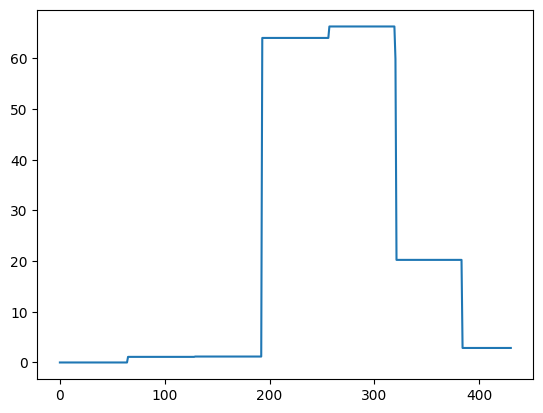

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r1_reshaped[:,-2])

In [8]:
# fig = plot_data_point_array(
#     list_of_data_points = r1_reshaped,
#     fft_size = fft_size * 2,
#     plot_spectra = True
# )
#
# fig.savefig(f'{base_folder}/r1_test_measurement.png', dpi=500)

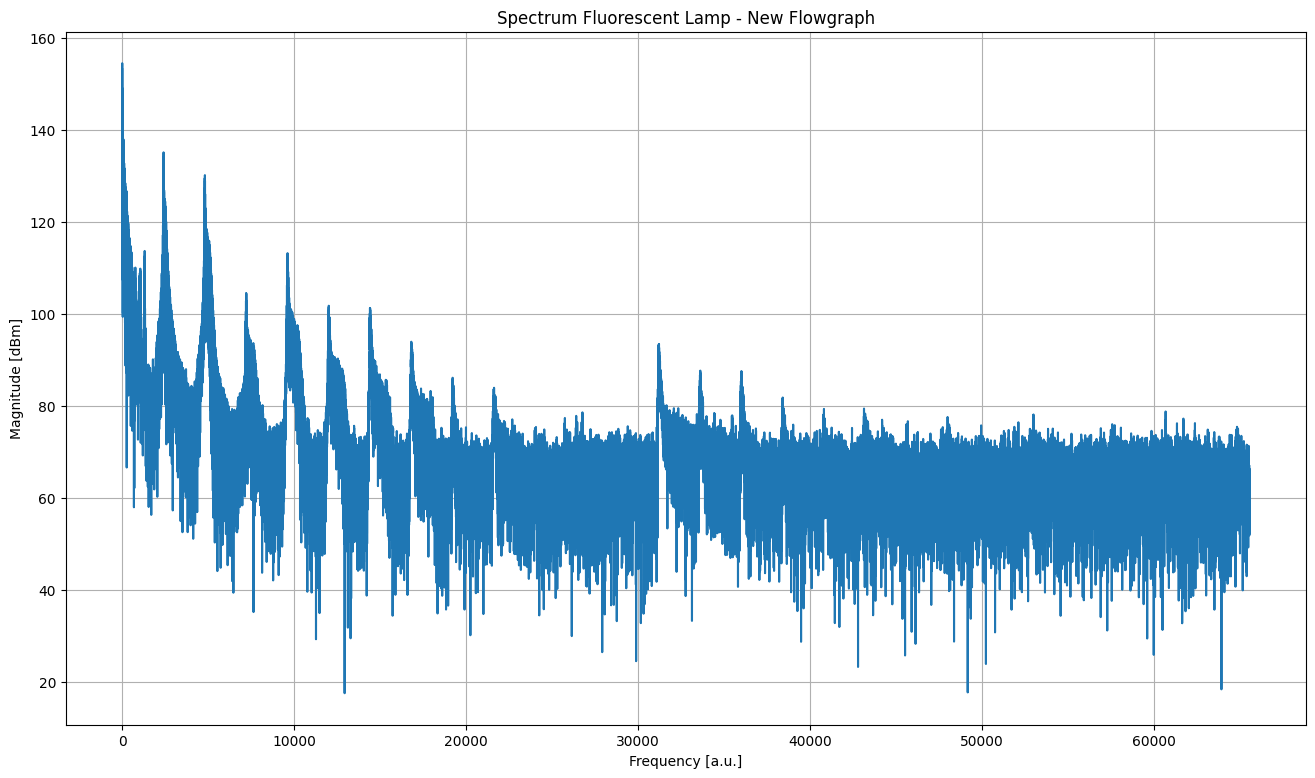

In [9]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(np.flip(10* np.log10(r1_reshaped[200, 2*fft_size:3*fft_size]) + 30))
ax.set_xlabel('Frequency [a.u.]')
ax.set_ylabel('Magnitude [dBm]')
ax.set_title('Spectrum Fluorescent Lamp - New Flowgraph')
ax.grid(True)
fig.savefig(f'{base_folder}/r1_test_spectrum_on_reversed.pdf')

In [10]:
orig_r1_folder = '/home/thomas/projects/fair/call_3/data/raw_data/2022-11-16_training_data/r1'

In [11]:
orig_r1 = read_training_files(path_to_folder=orig_r1_folder,
                              fft_size=fft_size*2)

In [12]:
# fig = plot_data_point_array(
#     list_of_data_points = orig_r1,
#     fft_size = fft_size * 2,
#     plot_spectra = True
# )
#
# fig.savefig(f'{base_folder}/r1_orig_measurement.png', dpi=500)

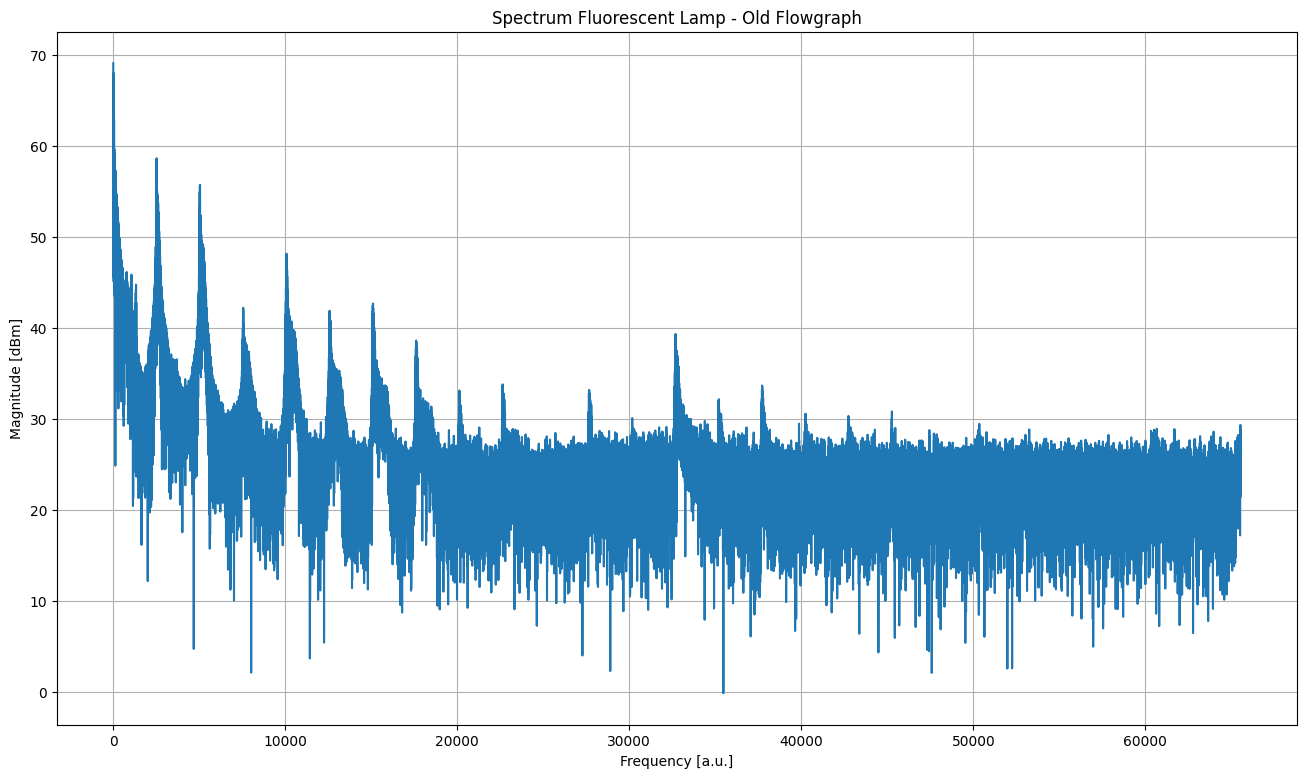

In [13]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(10* np.log10(orig_r1[200, 2*fft_size:3*fft_size]) + 30)
ax.set_xlabel('Frequency [a.u.]')
ax.set_ylabel('Magnitude [dBm]')
ax.set_title('Spectrum Fluorescent Lamp - Old Flowgraph')
ax.grid(True)
fig.savefig(f'{base_folder}/r1_spectrum_on.pdf')

In [ ]:
max_new = np.max(r1_reshaped)
min_new = np.min(r1_reshaped)
mean_new = np.mean(r1_reshaped[:,2*fft_size:3*fft_size])

In [ ]:
print(max_new, min_new, mean_new)

In [ ]:
max_old = np.max(orig_r1)
min_old = np.min(orig_r1)
mean_old = np.mean(orig_r1[:,2*fft_size:3*fft_size])

In [ ]:
print(max_old, min_old, mean_old)

In [ ]:
factor = max_old / max_new

In [ ]:
mean_factor = mean_old / mean_new
mean_factor

In [ ]:
def new_to_old_spectrum(new_spectrum: np.array, factor: float) -> np.array:
    """"""
    return np.flip(new_spectrum, axis=1) * factor

In [46]:
def watt_to_dbm(spectrum: np.array) -> np.array:
    return 10 * np.log10(spectrum) + 30

def dbm_to_watt(spectrum: np.array) -> np.array:
    return 10**((spectrum - 30) * 0.1)

def transform_in_dbm(new_spectrum_dbm: np.array, old_spectrum_dbm: np.array) -> np.array:
    new_min, new_max, new_mean = np.min(new_spectrum_dbm), np.max(new_spectrum_dbm), np.mean(new_spectrum_dbm)
    old_min, old_max, old_mean = np.min(old_spectrum_dbm), np.max(old_spectrum_dbm), np.mean(old_spectrum_dbm)

    offset = old_min - new_min
    max_factor = old_max / (new_max + offset)
    mean_factor = old_mean / (new_mean + offset)
    factor = np.mean((max_factor, mean_factor))

    transformed_dbm_spectrum = (new_spectrum_dbm + offset) * factor

    print(offset*factor, factor)

    return transformed_dbm_spectrum

In [35]:
new_spectrum_dbm = watt_to_dbm(r1_reshaped[200,2*fft_size:3*fft_size])

In [36]:
old_spectrum_dbm = watt_to_dbm(orig_r1[200,2*fft_size:3*fft_size])

In [47]:
transformed_dbm = transform_in_dbm(new_spectrum_dbm, old_spectrum_dbm)

-8.881469725920565 0.5002719012720522


In [22]:
print("{} {} {}".format(np.min(new_spectrum_dbm), np.max(new_spectrum_dbm), np.mean(new_spectrum_dbm)))

17.566204071044922 154.44247436523438 68.8126449584961


In [23]:
print("{} {} {}".format(np.min(old_spectrum_dbm), np.max(old_spectrum_dbm), np.mean(old_spectrum_dbm)))

-0.18708109915444382 69.13761920965806 25.261216905157248


In [38]:
print("{} {} {}".format(np.min(transformed_dbm), np.max(transformed_dbm), np.mean(transformed_dbm)))

-0.09359106421470642 68.38176727294922 25.54356575012207


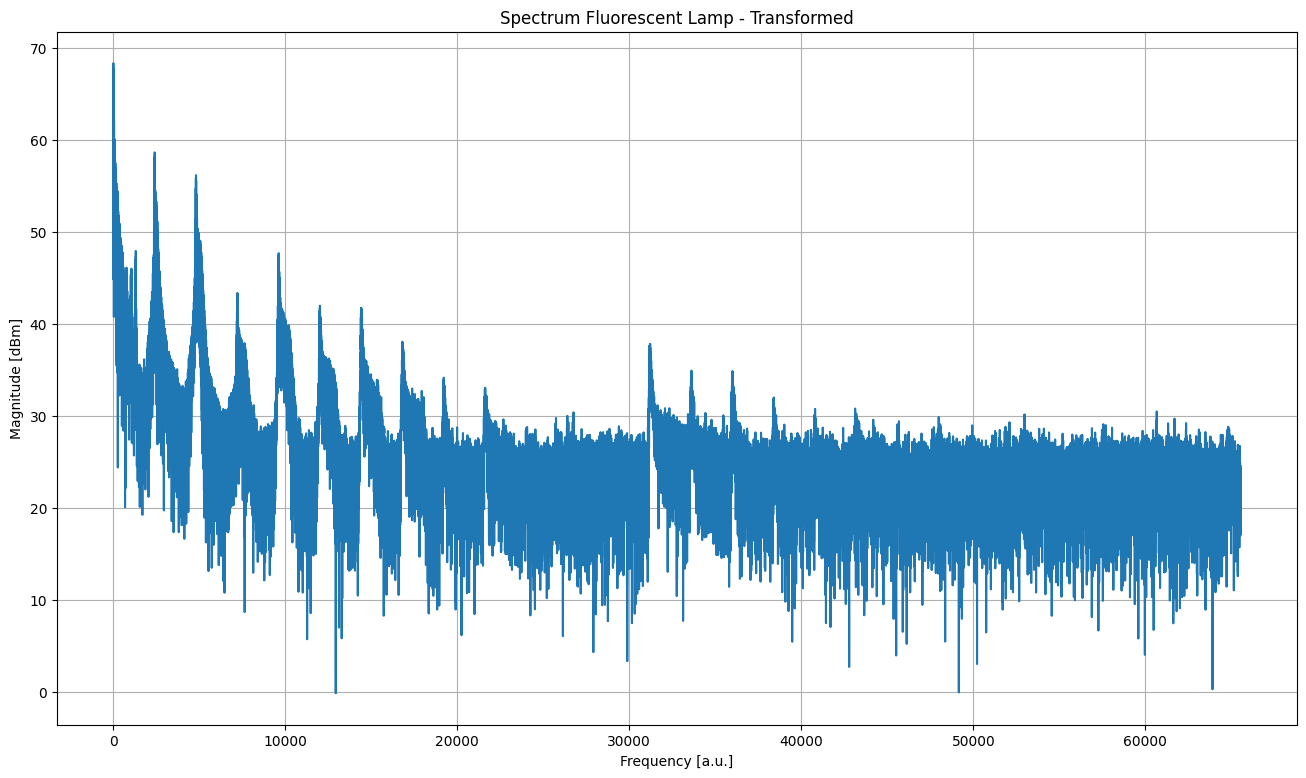

In [41]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(np.flip(transformed_dbm))
ax.set_xlabel('Frequency [a.u.]')
ax.set_ylabel('Magnitude [dBm]')
ax.set_title('Spectrum Fluorescent Lamp - Transformed')
ax.grid(True)
fig.savefig(f'{base_folder}/r1_transformed.pdf')

In [42]:
transformed = dbm_to_watt(transformed_dbm)

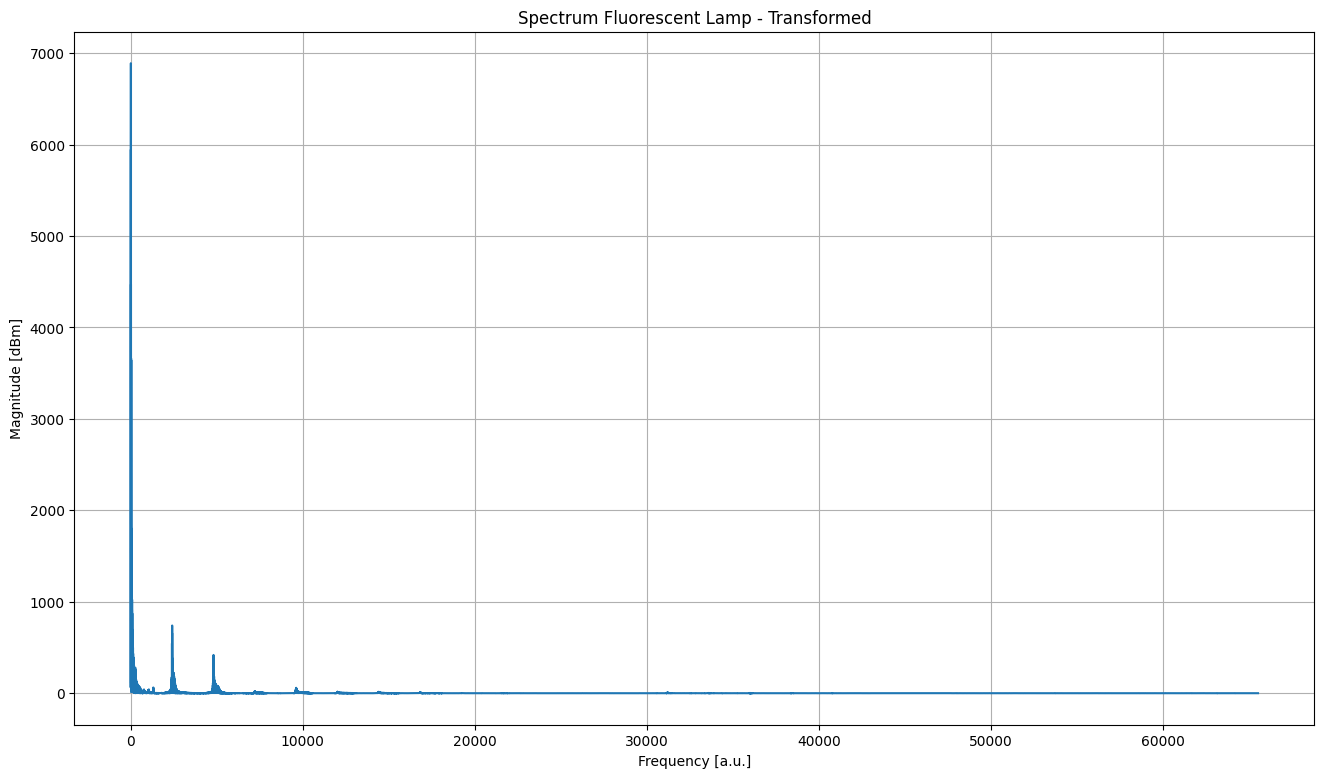

In [43]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(np.flip(transformed))
ax.set_xlabel('Frequency [a.u.]')
ax.set_ylabel('Magnitude [dBm]')
ax.set_title('Spectrum Fluorescent Lamp - Transformed')
ax.grid(True)
# fig.savefig(f'{base_folder}/r1_transformed.pdf')

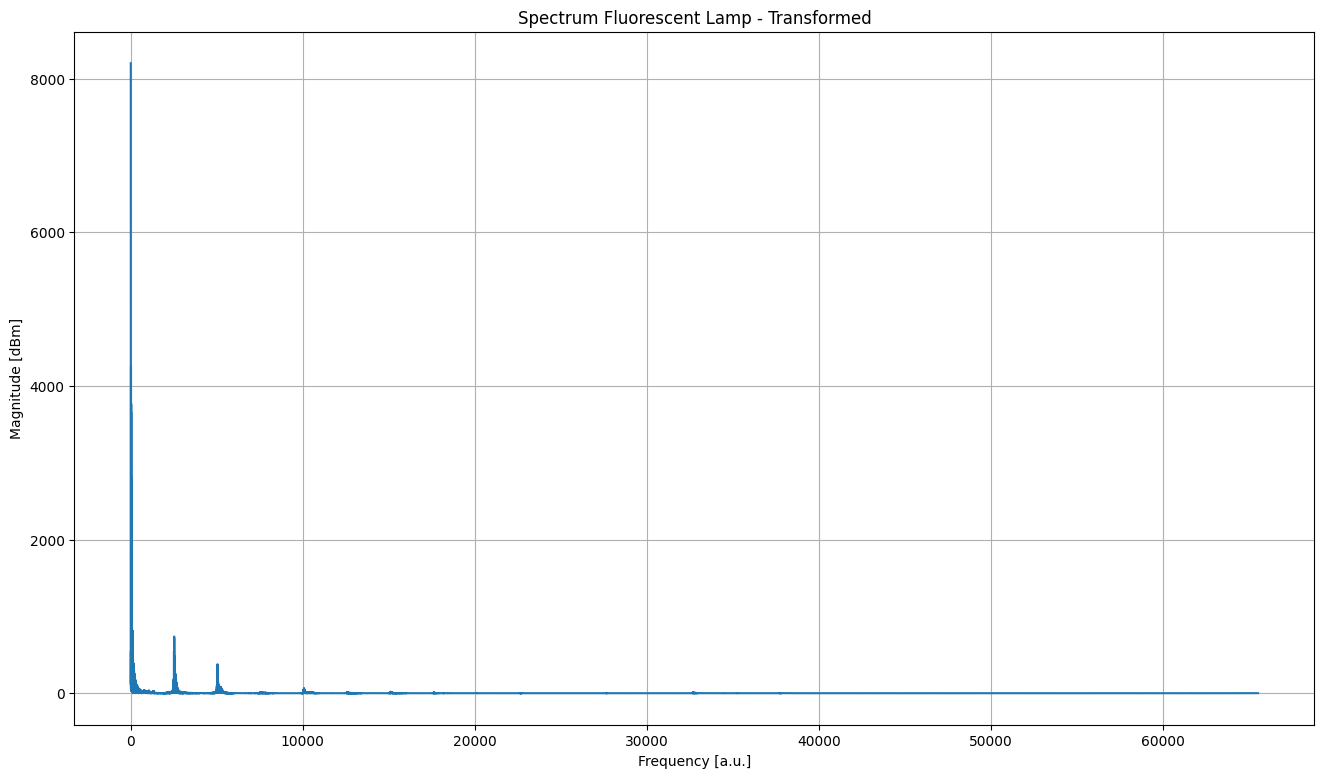

In [45]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(dbm_to_watt(old_spectrum_dbm))
ax.set_xlabel('Frequency [a.u.]')
ax.set_ylabel('Magnitude [dBm]')
ax.set_title('Spectrum Fluorescent Lamp - Transformed')
ax.grid(True)

In [25]:
sorted_indices = np.argsort(new_spectrum_dbm)
values_highest_peaks = new_spectrum_dbm[sorted_indices[:10]]
print(values_highest_peaks)

[17.566204 17.742954 18.410118 23.272356 23.916058 24.531029 25.769394
 25.898947 26.48685  28.291462]


In [ ]:
rescaled_new_spectrum = new_to_old_spectrum(r1_reshaped, mean_factor)

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(new_spectrum_dbm)
ax.set_xlabel('Frequency [a.u.]')
ax.set_ylabel('Magnitude [dBm]')
ax.set_title('Spectrum Fluorescent Lamp - Old Flowgraph')
ax.grid(True)

In [ ]:
np.min(rescaled_new_spectrum)

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(10* np.log10(rescaled_new_spectrum[200, 2*fft_size:3*fft_size]) + 30)
ax.set_xlabel('Frequency [a.u.]')
ax.set_ylabel('Magnitude [dBm]')
ax.set_title('Spectrum Fluorescent Lamp - Old Flowgraph')
ax.grid(True)
fig.savefig(f'{base_folder}/r1_new_rescaled.pdf')

In [ ]:
10* np.log10(rescaled_new_spectrum[200, 2*fft_size:3*fft_size]) + 30

In [ ]:
rescaled_new_spectrum[200, 2*fft_size:3*fft_size]